<a href="https://colab.research.google.com/github/aaryaddeshmukh10/BML-experiments/blob/main/Copy_of_Exp_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/iris/iris.csv'

column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

df = pd.read_csv(file_path, header = None, names = column_names)

print(df.head())


Mounted at /content/drive
   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


*Manual Implementation*

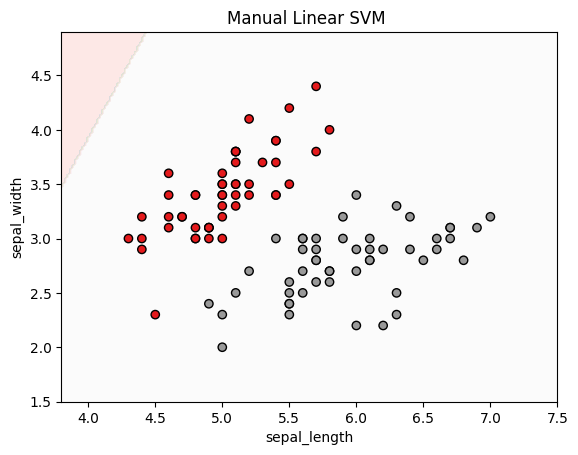

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

X = df[['sepal_length', 'sepal_width']].values
y = LabelEncoder().fit_transform(df['class'])

mask = y < 2
X = X[mask]
y = y[mask]
y = np.where(y == 0, -1, 1)

X = np.hstack([X, np.ones((X.shape[0], 1))])

lr = 0.001
C = 1
epochs = 1000

w = np.zeros(X.shape[1])

for _ in range(epochs):
    for i, xi in enumerate(X):
        condition = y[i] * np.dot(w, xi)
        if condition >= 1:
            grad = w.copy()
            grad[-1] = 0
        else:
            grad = w.copy()
            grad[-1] = 0
            grad -= C * y[i] * xi
        w -= lr * grad

w_vec, b = w[:-1], w[-1]

xmin, xmax = X[:, 0].min()-0.5, X[:, 0].max()+0.5
ymin, ymax = X[:, 1].min()-0.5, X[:, 1].max()+0.5
xx, yy = np.meshgrid(np.linspace(xmin, xmax, 200),
                     np.linspace(ymin, ymax, 200))

grid = np.c_[xx.ravel(), yy.ravel(), np.ones(xx.ravel().shape)]
Z = np.sign(np.dot(grid, w))
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap="Pastel1")
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="Set1", edgecolors="k")
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.title("Manual Linear SVM ")
plt.show()


*Built-in Method*

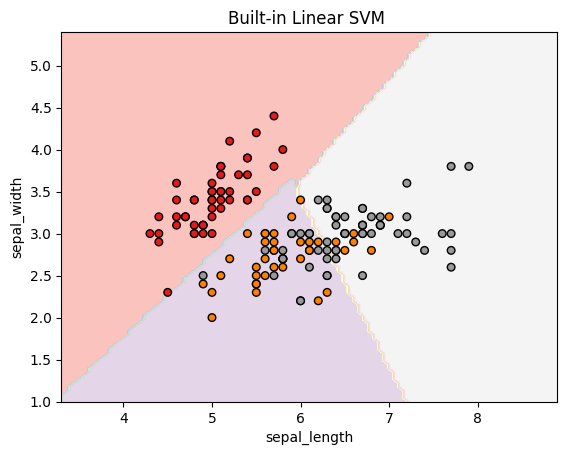

In [ ]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

X = df[['sepal_length', 'sepal_width']].values
y = LabelEncoder().fit_transform(df['class'])

feature_names = ['sepal_length', 'sepal_width']

svm = SVC(kernel="linear", C=1)
svm.fit(X, y)

DecisionBoundaryDisplay.from_estimator(
    svm,
    X,
    response_method="predict",
    alpha=0.8,
    cmap="Pastel1",
    xlabel=feature_names[0],
    ylabel=feature_names[1],
)

plt.scatter(X[:, 0], X[:, 1],
            c=y,
            s=30, edgecolors="k", cmap="Set1")
plt.title("Built-in Linear SVM ")
plt.show()
